# Clustering 실습


1.   Hierarchical clustering
2.   K-means clustering
3.   Mean Shift clustering
4.   GMM clustering
5.   DBSCAN clustering
6.   Clustering 방법 비교

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##1. Hierarchical clustering


#### Sample data

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [3]:
data = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91]])

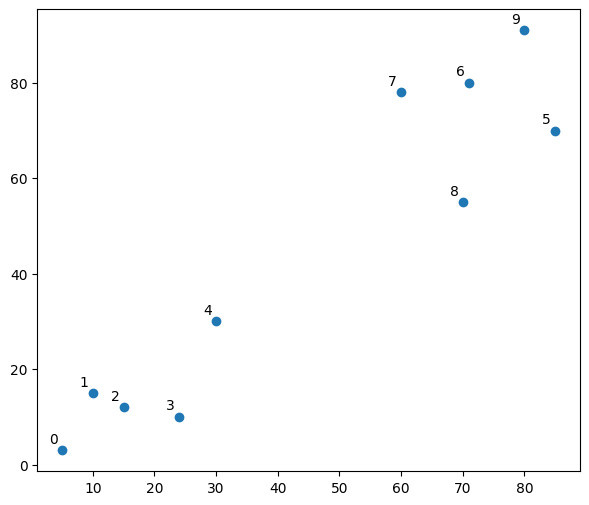

In [4]:
plt.figure(figsize=(7, 6))
plt.scatter(data[:,0],data[:,1])

for i, x, y in zip(range(0,data.shape[0]), data[:, 0], data[:, 1]):
    plt.annotate(
        i,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

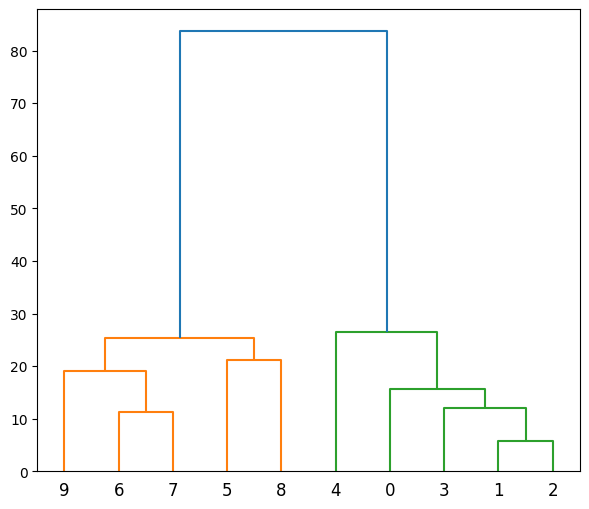

In [5]:
model_hc = linkage(data, 'average')
plt.figure(figsize=(7,6))
dendrogram(model_hc, labels=range(0,data.shape[0]))
plt.show()

#### Iris dataset

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['class'] = iris.target
iris_df['class'] = iris_df['class'].map(dict(zip([0,1,2],iris.target_names)))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


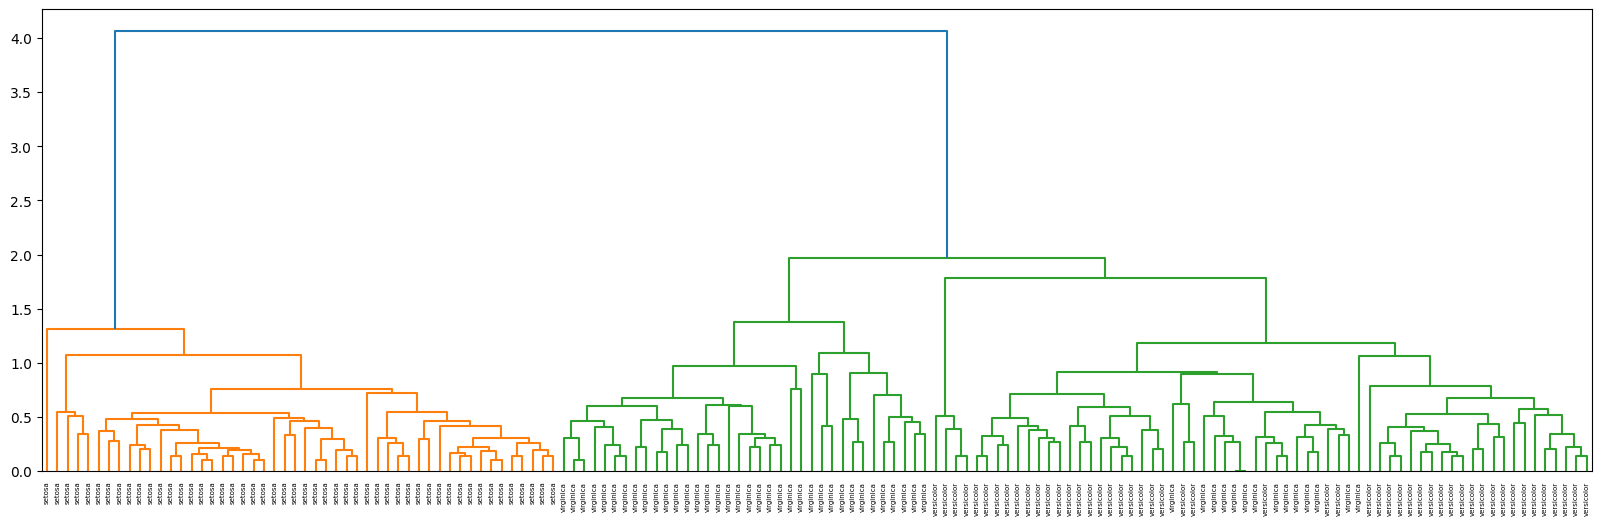

In [7]:
data = iris_df.iloc[:,:4]
model_hc = linkage(data, 'average')
plt.figure(figsize=(20,6))
dendrogram(model_hc, labels=np.array(iris_df['class']))
plt.show()

In [8]:
predicted = pd.DataFrame(cut_tree(model_hc, n_clusters=3), columns=['cluster'])
pd.crosstab(iris_df['class'], predicted['cluster'])

cluster,0,1,2
class,,,
setosa,50,0,0
versicolor,0,50,0
virginica,0,14,36


##2. K-means clustering

In [10]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=3, algorithm='lloyd')
model_kmeans.fit(data)
predict = pd.DataFrame(model_kmeans.predict(data), columns=['cluster'])

In [11]:
pd.crosstab(iris_df['class'], predict['cluster'])

cluster,0,1,2
class,,,
setosa,50,0,0
versicolor,0,3,47
virginica,0,36,14


##3.   Mean Shift clustering

In [12]:
from sklearn.cluster import MeanShift

model_mmshift = MeanShift(bandwidth=0.85)
# model_mmshift = MeanShift(bandwidth=0.8)
predict = pd.DataFrame(model_mmshift.fit_predict(iris_df.iloc[:,:4]), columns=['cluster'])
print('Clusters :\t', set(predict['cluster']))

Clusters :	 {0, 1, 2}


In [13]:
pd.crosstab(iris_df['class'], predict['cluster'])

cluster,0,1,2
class,,,
setosa,0,50,0
versicolor,48,0,2
virginica,13,0,37


##4.   GMM clustering

In [14]:
from sklearn.mixture import GaussianMixture

model_gmm = GaussianMixture(n_components=3)
predict = pd.DataFrame(model_gmm.fit_predict(iris_df.iloc[:,:4]), columns=['cluster'])

In [15]:
pd.crosstab(iris_df['class'], predict['cluster'])

cluster,0,1,2
class,,,
setosa,50,0,0
versicolor,0,5,45
virginica,0,50,0


##5.   DBSCAN clustering

In [16]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=0.85, min_samples=4)
predict = pd.DataFrame(model_dbscan.fit_predict(iris_df.iloc[:,:4]), columns=['cluster'])

In [17]:
pd.crosstab(iris_df['class'], predict['cluster'])

cluster,-1,0,1
class,,,
setosa,0,50,0
versicolor,0,0,50
virginica,1,0,49


##6.   Clustering 방법 비교

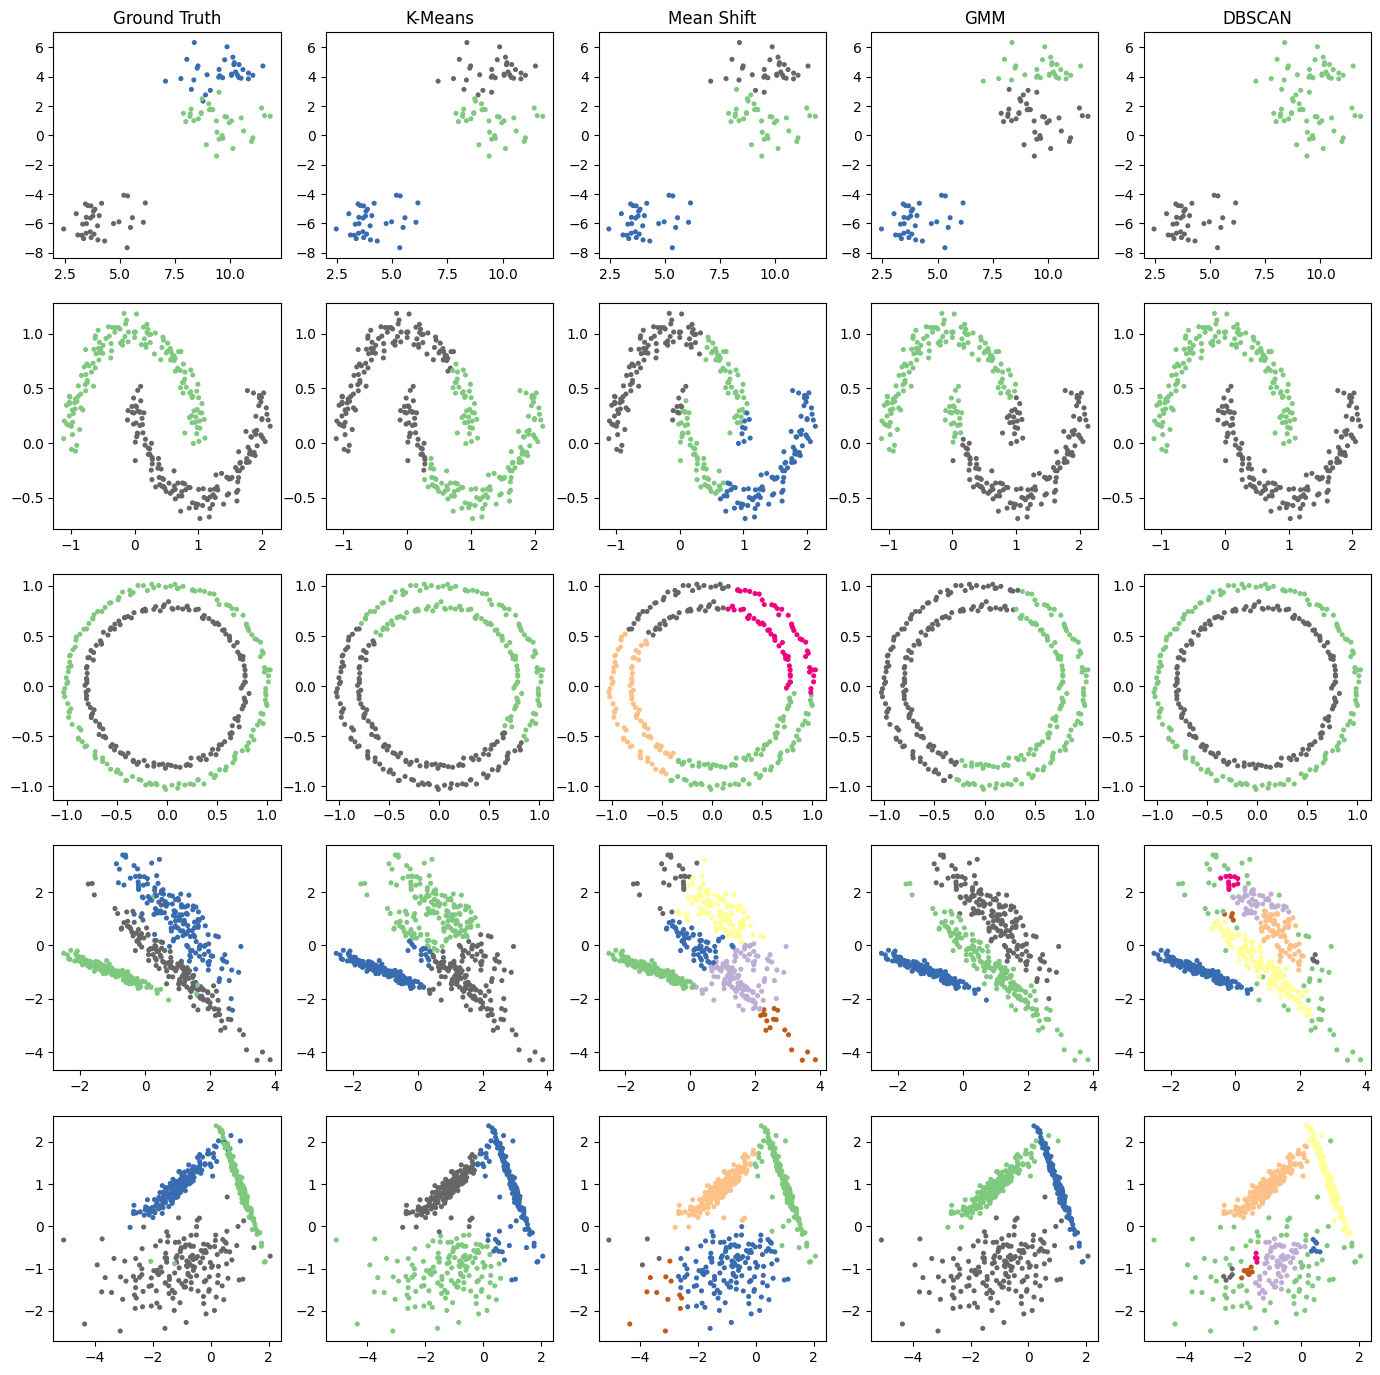

In [21]:
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

plt.figure(figsize=(17,17))
plt.set_cmap('Accent')

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=4)
plt.subplot(5,5,1)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.title('Ground Truth')
plt.subplot(5,5,2)
y = KMeans(n_clusters=3, algorithm='lloyd').fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.title('K-Means')
plt.subplot(5,5,3)
y = MeanShift(bandwidth=1.8).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.title('Mean Shift')
plt.subplot(5,5,4)
y = GaussianMixture(n_components=3).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.title('GMM')
plt.subplot(5,5,5)
y = DBSCAN(eps=1.2, min_samples=3).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.title('DBSCAN')

X, y = make_moons(n_samples=300, noise=0.08, random_state=5)
plt.subplot(5,5,6)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,7)
y = KMeans(n_clusters=2, algorithm='lloyd').fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,8)
y = MeanShift(bandwidth=0.8).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,9)
y = GaussianMixture(n_components=2).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,10)
y = DBSCAN(eps=0.3, min_samples=5).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)

X, y = make_circles(n_samples=300, noise=0.02, random_state=2)
plt.subplot(5,5,11)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,12)
y = KMeans(n_clusters=2, algorithm='lloyd').fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,13)
y = MeanShift(bandwidth=0.8).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,14)
y = GaussianMixture(n_components=2).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,15)
y = DBSCAN(eps=0.12, min_samples=4).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=16)
plt.subplot(5,5,16)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,17)
y = KMeans(n_clusters=3, algorithm='lloyd').fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,18)
y = MeanShift(bandwidth=0.8).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,19)
y = GaussianMixture(n_components=3).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,20)
y = DBSCAN(eps=0.23, min_samples=4).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=21)
plt.subplot(5,5,21)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,22)
y = KMeans(n_clusters=3, algorithm='lloyd').fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,23)
y = MeanShift(bandwidth=0.8).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,24)
y = GaussianMixture(n_components=3).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)
plt.subplot(5,5,25)
y = DBSCAN(eps=0.23, min_samples=5).fit_predict(X)
plt.scatter(x=X[:,0], y=X[:,1], c=y, s=7)

plt.show()